In [3]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

# Experiment 3

In [4]:
A = np.array([40, 50, 55, 60, 70])
error_angle = np.linspace(1, 1, 4) # Assumed uncertainty of 1 degree for angles
I = np.array([54.4, 23.1, 15.6, 13.2, 318])# Intensity no uncertainty

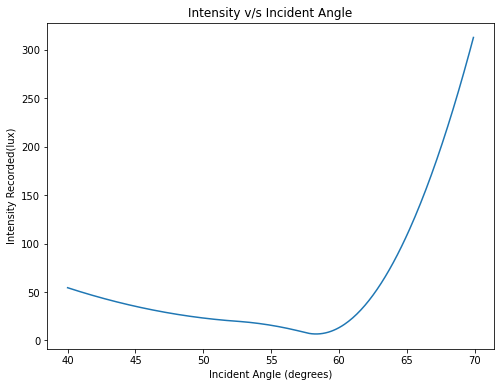

Brewster's angle is at 58.3 +- 1.0
Index of refraction is arond 1.6


In [10]:
fig, ax = plt.subplots(figsize=(8,6))
func = interp1d(A, I,
                kind='quadratic')
angle = np.arange(40, 70, 0.1)
intensity = func(angle)
ax.plot(angle, intensity)
ax.set_xlabel('Incident Angle (degrees)')
ax.set_ylabel('Intensity Recorded(lux)')
ax.set_title('Intensity v/s Incident Angle')
plt.show()
brewster = angle[np.where(intensity == min(intensity))[0]]
print("Brewster's angle is at", np.round(brewster[0], 1), "+-", 1.0)
print("Index of refraction is arond", np.round(np.tan(np.radians(brewster[0])),1))

Brewster's angle is where the angle of reflection has minimum intensity. We interpolate data to get a better reading of the minimum intensity value we can get. Our Brewster's angle is found to be $(58.3 \pm 1.0)^{\circ}$. Using this, we can determine the index of refraction of the plate since we know index of refraction of air is 1.0 and $\tan(\theta_b)=\frac{n_2}{n_1} = n_2$. We find our index of refraction to be approximately around $1.6$

# Experiment 1

Text(0.5, 1.0, 'Intensity v/s Degree Change')

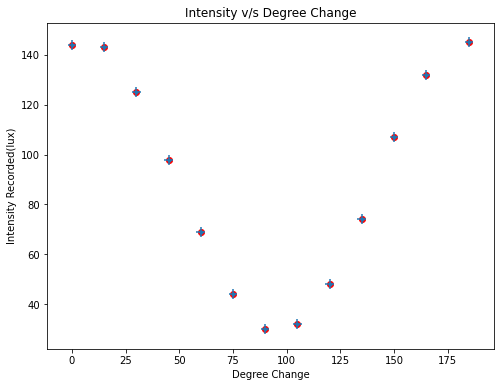

In [91]:
I0=np.linspace(167,167,13)
Ibg=np.linspace(5.5, 5.5, 13)
degree_change = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 185])
degree_error = np.linspace(2, 2, 13)
intensity_errors = np.linspace(2, 2, 13)
intensity = np.array([144, 143, 125, 98, 69, 44, 30, 32, 48, 74, 107, 132, 145])
fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(degree_change, intensity, fmt='.', xerr=degree_error, yerr=intensity_errors) 
ax.scatter(degree_change, intensity, color = 'red')
ax.set_xlabel('Degree Change')
ax.set_ylabel('Intensity Recorded(lux)')
ax.set_title('Intensity v/s Degree Change')


In [79]:
def model(theta, A, B, C):
    theta_radians = np.radians(degree_change)
    return A*(np.cos(theta_radians-B))**2+C

Best fit parameter for I_not is 116.8 +- 0.7
Best fit parameter for theta_not is -53.3 +- 0.0
Best fit parameter for I_bg is 28.7 +- 0.4


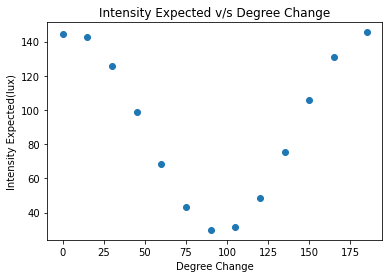

In [101]:

popt, pcov = scipy.optimize.curve_fit(model, degree_change, intensity)
popt_uncertainties = np.sqrt(np.diag(pcov)) 
print('Best fit parameter for I_not is', np.round(popt[0],1), '+-', np.round(popt_uncertainties[0], 1))
print('Best fit parameter for theta_not is', np.round(popt[1],1), '+-', np.round(popt_uncertainties[1], 1))
print('Best fit parameter for I_bg is', np.round(popt[2],1), '+-', np.round(popt_uncertainties[2], 1))


y=model(degree_change, popt[0], popt[1], popt[2])
plt.scatter(degree_change,y)
plt.xlabel('Degree Change')
plt.ylabel('Intensity Expected(lux)')
plt.title('Intensity Expected v/s Degree Change')
plt.show()


In [104]:
weights=1/np.sqrt((degree_error)**2+(intensity_errors)**2)

chi_squared_reduced = (sum(weights*(intensity - y)**2))/10
print('Reduced Chi-Square', chi_squared_reduced) #degree of freedom = 13-3=10


Reduced Chi-Square 0.2796076317509713
